In [1]:
#importamos las librerias para poder analizar

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Leemos el archivo y compprobemos cargue bien
df = pd.read_csv("TraficoGlobalDispositivos.csv")

df.head()

,Date,Desktop,Mobile,Tablet
0,2009-01,99.33,0.67,0.0
1,2009-02,99.31,0.69,0.0
2,2009-03,99.20,0.80,0.0
3,2009-04,99.14,0.86,0.0
4,2009-05,99.14,0.86,0.0


In [ ]:
#Vemos info general del DF

df.info()

# Se observa que no hay ningun nulo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     200 non-null    object 
 1   Desktop  200 non-null    float64
 2   Mobile   200 non-null    float64
 3   Tablet   200 non-null    float64
dtypes: float64(3), object(1)
memory usage: 6.4+ KB


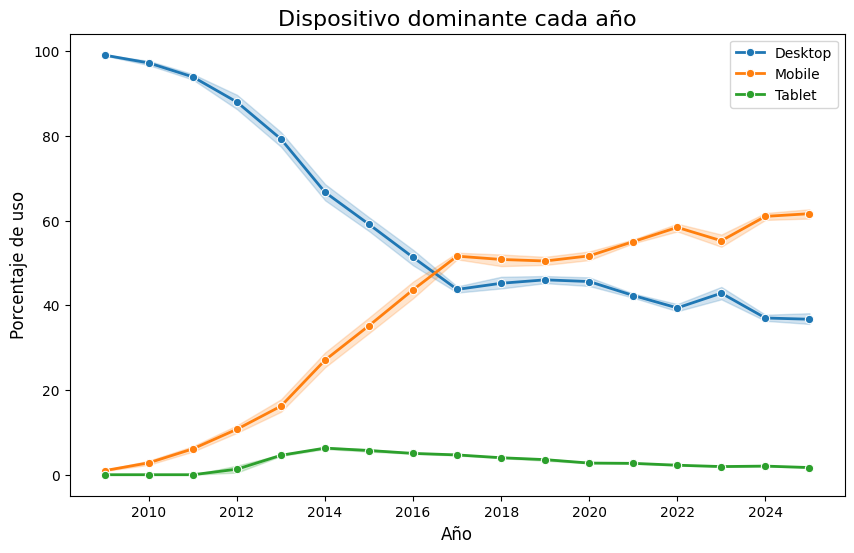

In [5]:
# Dispositivo que domina cada año

df["Dominante"] = df[["Desktop","Mobile","Tablet"]].idxmax(axis=1)
plt.figure(figsize=(10,6))
sns.lineplot(x=df["Year"], y=df["Desktop"], marker="o", label="Desktop", linewidth=2)
sns.lineplot(x=df["Year"], y=df["Mobile"], marker="o", label="Mobile", linewidth=2)
sns.lineplot(x=df["Year"], y=df["Tablet"], marker="o", label="Tablet", linewidth=2)

plt.title("Dispositivo dominante cada año", fontsize=16)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Porcentaje de uso", fontsize=12)
plt.legend()
plt.show()

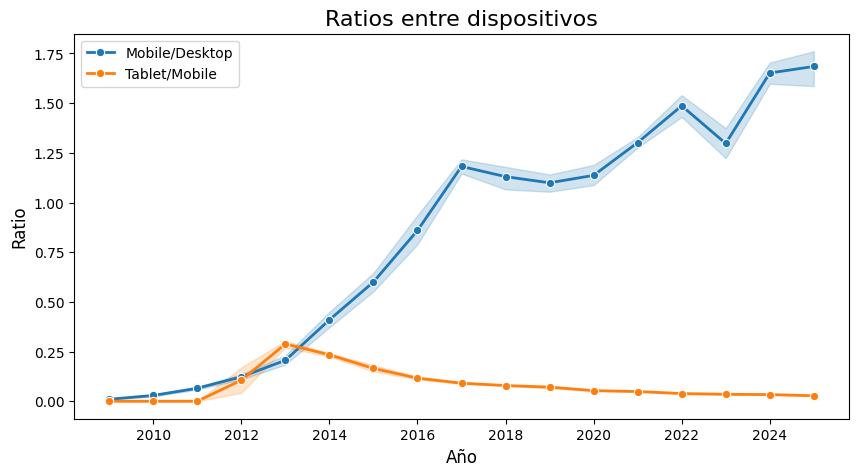

In [ ]:
# Vemos los ratios entre los dispositivos

df["Mobile_vs_Desktop"] = df["Mobile"] / df["Desktop"]
df["Tablet_vs_Mobile"] = df["Tablet"] / df["Mobile"]


plt.figure(figsize=(10,5))
sns.lineplot(x=df["Year"], y=df["Mobile_vs_Desktop"], marker="o", label="Mobile/Desktop", linewidth=2)
sns.lineplot(x=df["Year"], y=df["Tablet_vs_Mobile"], marker="o", label="Tablet/Mobile", linewidth=2)
plt.title("Ratios entre dispositivos", fontsize=16)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Ratio", fontsize=12)
plt.legend()
plt.show()

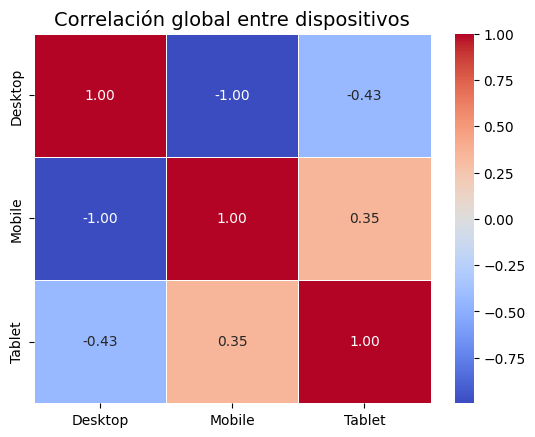

In [8]:
#Para darle otro enfoque y al mismo tiempo apoyar loa anterior plt.figure(figsize=(6,5))

sns.heatmap(df[["Desktop","Mobile","Tablet"]].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlación global entre dispositivos", fontsize=14)
plt.show()

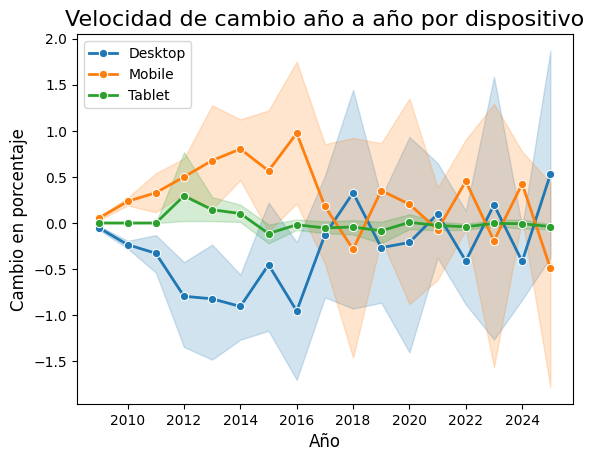

In [11]:
# Ahora veremos cuanto cambio un dispositivo respecto al año anterior

df_diff = df[["Desktop","Mobile","Tablet"]].diff()

sns.lineplot(x=df["Year"], y=df_diff["Desktop"], marker="o", label="Desktop", linewidth=2)
sns.lineplot(x=df["Year"], y=df_diff["Mobile"], marker="o", label="Mobile", linewidth=2)
sns.lineplot(x=df["Year"], y=df_diff["Tablet"], marker="o", label="Tablet", linewidth=2)

plt.title("Velocidad de cambio año a año por dispositivo", fontsize=16)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Cambio en porcentaje", fontsize=12)
plt.legend()
plt.show()
